# Time Series Analysis and Forecasting of Superstore

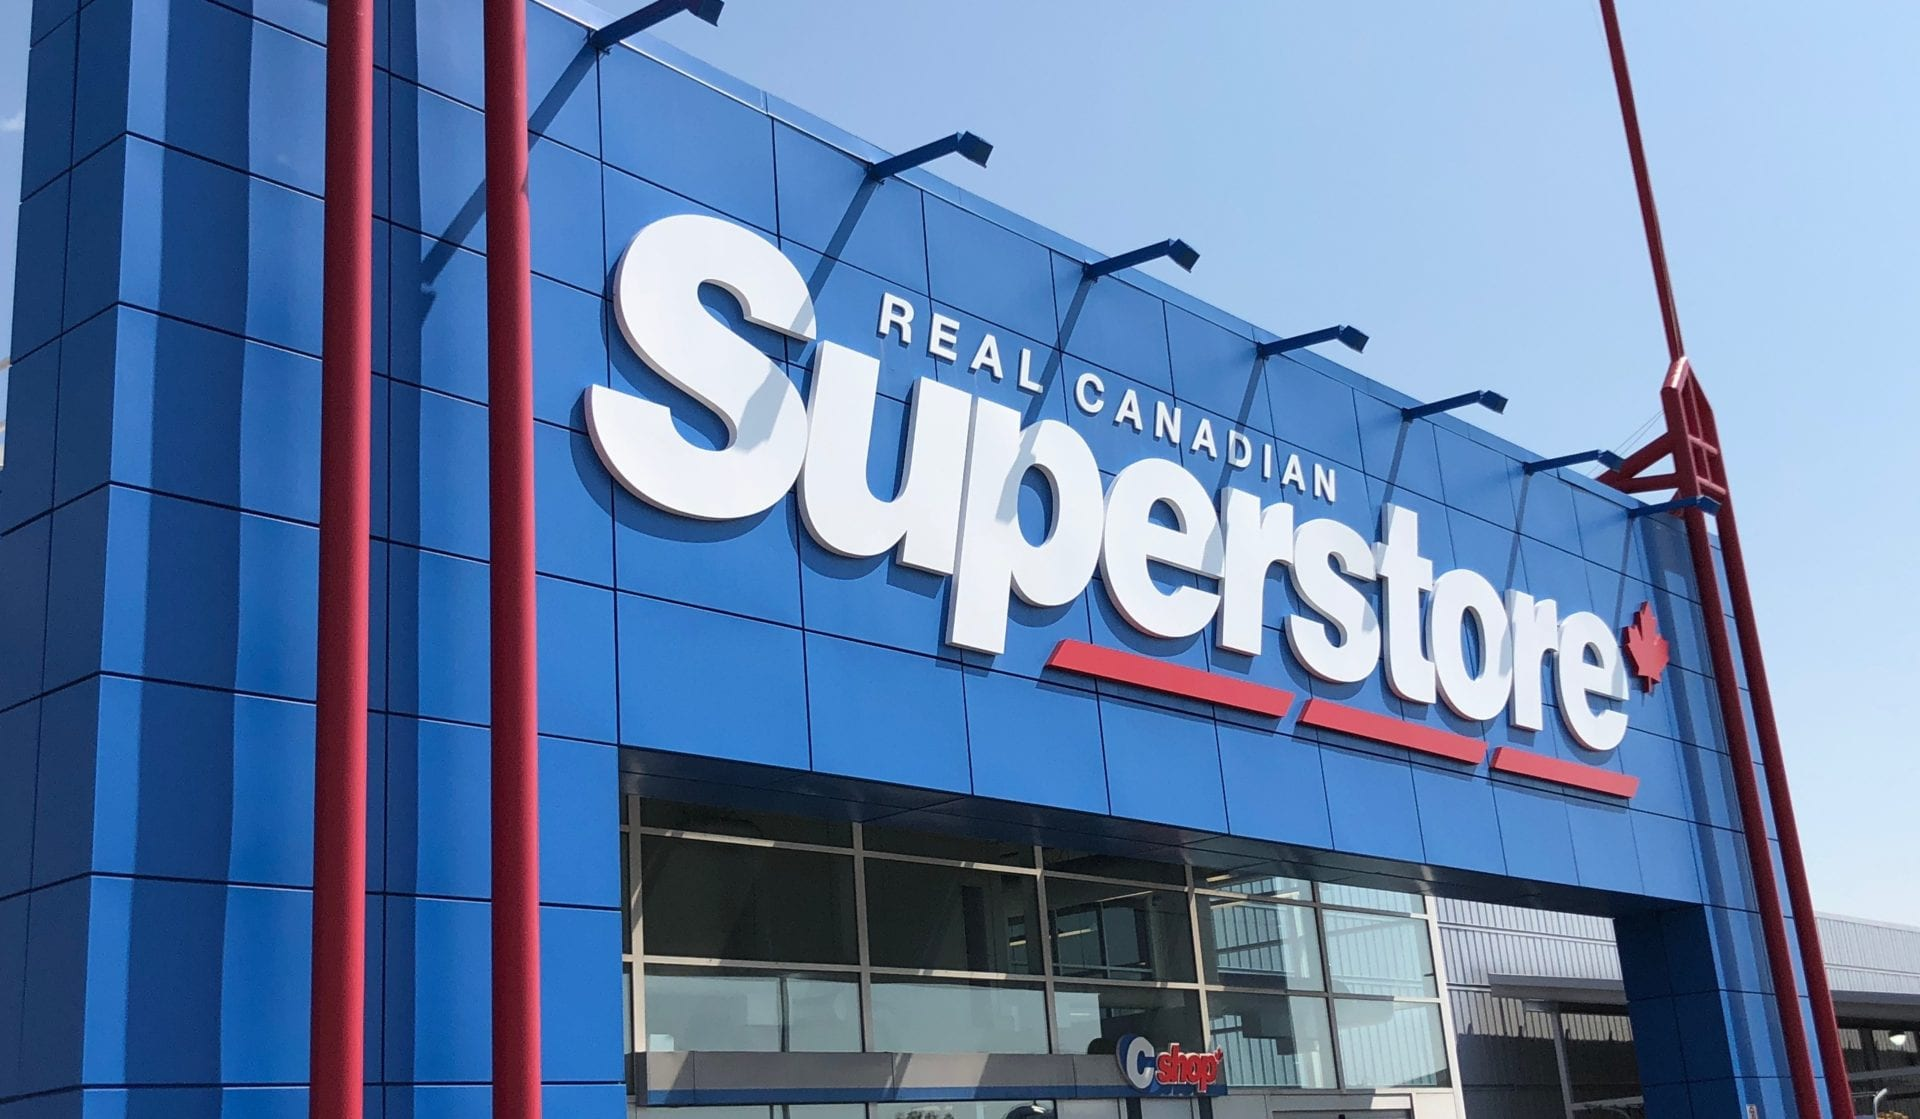

The Superstore is a retailer that sells a variety of products. The data science project would use time series analysis to forecast future sales for the Superstore. The project would involve the following steps:

Data collection: The first step would be to collect data on historical sales for the Superstore.
Data cleaning: The next step would be to clean the data and remove any errors or inconsistencies. This would involve checking for missing values, outliers, and duplicate data.
Exploratory data analysis: The third step would be to perform exploratory data analysis (EDA) on the data. This would involve visualizing the data and looking for patterns and trends.
Modeling: The fourth step would be to build a time series forecasting model. There are a variety of time series forecasting models available, such as ARIMA, Exponential Smoothing, and Prophet.
Forecasting: The fifth step would be to use the model to forecast future sales for the Superstore. The forecasts would be generated for a specific time period, such as the next quarter or the next year.
Evaluation: The final step would be to evaluate the accuracy of the forecasts. This would involve comparing different models of machine learning which have been applied earlier.

In [1]:
#importing libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

In [2]:
#read the store data
df = pd.read_excel('Sample - Superstore.xls')
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [3]:
#specifying furniture from category column
furniture= df.loc[df['Category']=='Furniture']
furniture

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
5          6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
10        11  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
...      ...             ...        ...        ...             ...   
9962    9963  CA-2015-168088 2015-03-19 2015-03-22     First Class   
9964    9965  CA-2016-146374 2016-12-05 2016-12-10    Second Class   
9980    9981  US-2015-151435 2015-09-06 2015-09-09    Second Class   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   

     Customer ID     Customer Name      Segment        Country  \
0       CG-12520       Claire Gute     Consumer  United States   
1       CG-12520       Claire Gute     Consumer  United States   
3       SO-20335    Sean O'Donnell     Consumer  United States   
5       BH-11710   Brosina Hoffman     Consumer  United States   
10      BH-11710   Brosina Hoffman     Consumer  United States   
...          ...               ...          ...            ...   
9962    CM-12655  Corinna Mitchell  Home Office  United States   
9964    HE-14800      Harold Engle    Corporate  United States   
9980    SW-20455       Shaun Weien     Consumer  United States   
9989    TB-21400  Tom Boeckenhauer     Consumer  United States   
9990    DB-13060       Dave Brooks     Consumer  United States   

                 City  ... Postal Code   Region       Product ID   Category  \
0           Henderson  ...       42420    South  FUR-BO-10001798  Furniture   
1           Henderson  ...       42420    South  FUR-CH-10000454  Furniture   
3     Fort Lauderdale  ...       33311    South  FUR-TA-10000577  Furniture   
5         Los Angeles  ...       90032     West  FUR-FU-10001487  Furniture   
10        Los Angeles  ...       90032     West  FUR-TA-10001539  Furniture   
...               ...  ...         ...      ...              ...        ...   
9962          Houston  ...       77041  Central  FUR-BO-10004218  Furniture   
9964           Newark  ...       19711     East  FUR-FU-10002671  Furniture   
9980        Lafayette  ...       70506    South  FUR-TA-10001039  Furniture   
9989            Miami  ...       33180    South  FUR-FU-10001889  Furniture   
9990       Costa Mesa  ...       92627     West  FUR-FU-10000747  Furniture   

     Sub-Category                                       Product Name  \
0       Bookcases                  Bush Somerset Collection Bookcase   
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
3          Tables      Bretford CR4500 Series Slim Rectangular Table   
5     Furnishings  Eldon Expressions Wood and Plastic Desk Access...   
10         Tables           Chromcraft Rectangular Conference Tables   
...           ...                                                ...   
9962    Bookcases  Bush Heritage Pine Collection 5-Shelf Bookcase...   
9964  Furnishings  Electrix 20W Halogen Replacement Bulb for Zoom...   
9980       Tables                         KI Adjustable-Height Table   
9989  Furnishings                             Ultra Door Pull Handle   
9990  Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   

          Sales  Quantity  Discount    Profit  
0      261.9600         2      0.00   41.9136  
1      731.9400         3      0.00  219.5820  
3      957.5775         5      0.45 -383.0310  
5       48.8600         7      0.00   14.1694  
10    1706.1840         9      0.20   85.3092  
...         ...       ...       ...       ...  
9962   383.4656         4      0.32  -67.6704  
9964    13.4000         1      0.00    6.4320  
9980    85.9800         1      0.00   22.3548  
9989    25.2480         3      0.20    4.1028  
9990    91.9600         2     

In [4]:
#exploring the timeline of recorded sales
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

## Data Preprocessing

This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [5]:
#Data preprocessing
cols= ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture= furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [6]:
furniture

Order Date     Sales
7474 2014-01-06  2573.820
7660 2014-01-07    76.728
866  2014-01-10    51.940
716  2014-01-11     9.940
2978 2014-01-13   545.940
...         ...       ...
7636 2017-12-29   258.750
7632 2017-12-29  1207.840
5131 2017-12-29   101.120
7635 2017-12-29   300.980
906  2017-12-30   323.136

[2121 rows x 2 columns]

In [7]:
#sorting data according to date
furniture = furniture.groupby('Order Date')

In [8]:
furniture= furniture['Sales'].sum().reset_index()
furniture.head()

Order Date     Sales
0 2014-01-06  2573.820
1 2014-01-07    76.728
2 2014-01-10    51.940
3 2014-01-11     9.940
4 2014-01-13   879.939

## Indexing with time series data

In [9]:
furniture = furniture.set_index('Order Date')
furniture

Sales
Order Date           
2014-01-06  2573.8200
2014-01-07    76.7280
2014-01-10    51.9400
2014-01-11     9.9400
2014-01-13   879.9390
...               ...
2017-12-24  1393.4940
2017-12-25   832.4540
2017-12-28   551.2568
2017-12-29  2330.7180
2017-12-30   323.1360

[889 rows x 1 columns]

In [10]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [11]:
#exploring sales per year
y= furniture['Sales'].resample('MS').mean()
y.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

Let's have a quick peek over 2017 sales data.

In [12]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

## Visualizing furniture sales time series data

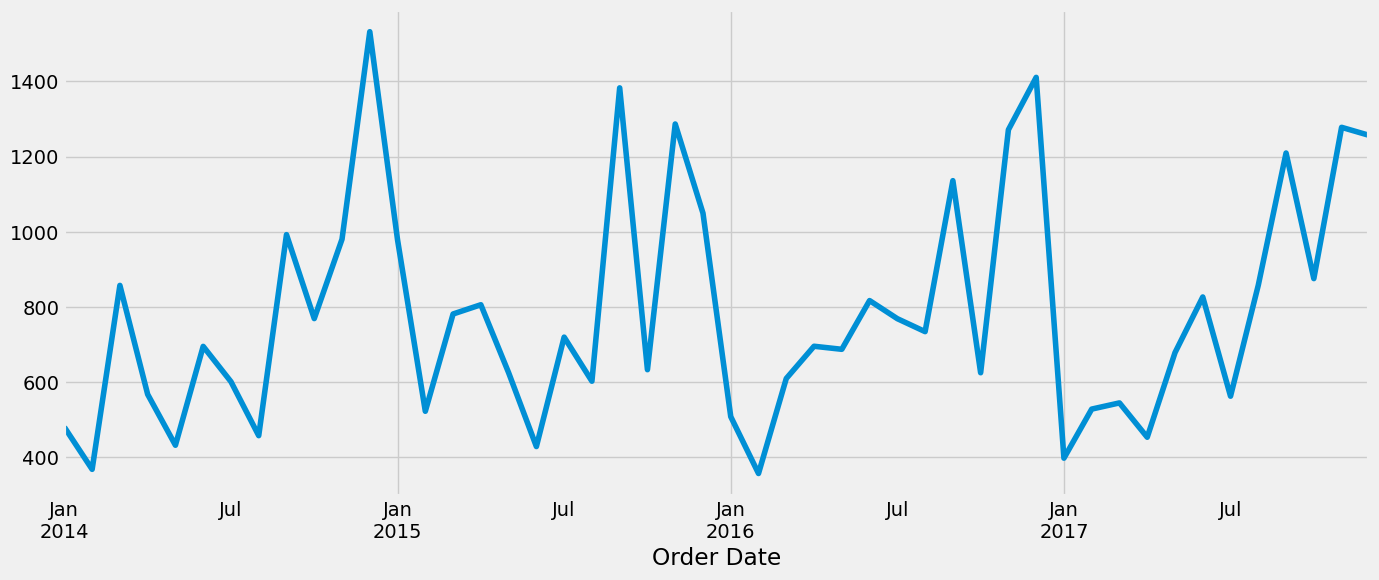

In [13]:
y.plot(figsize=(15,6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always a strong upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

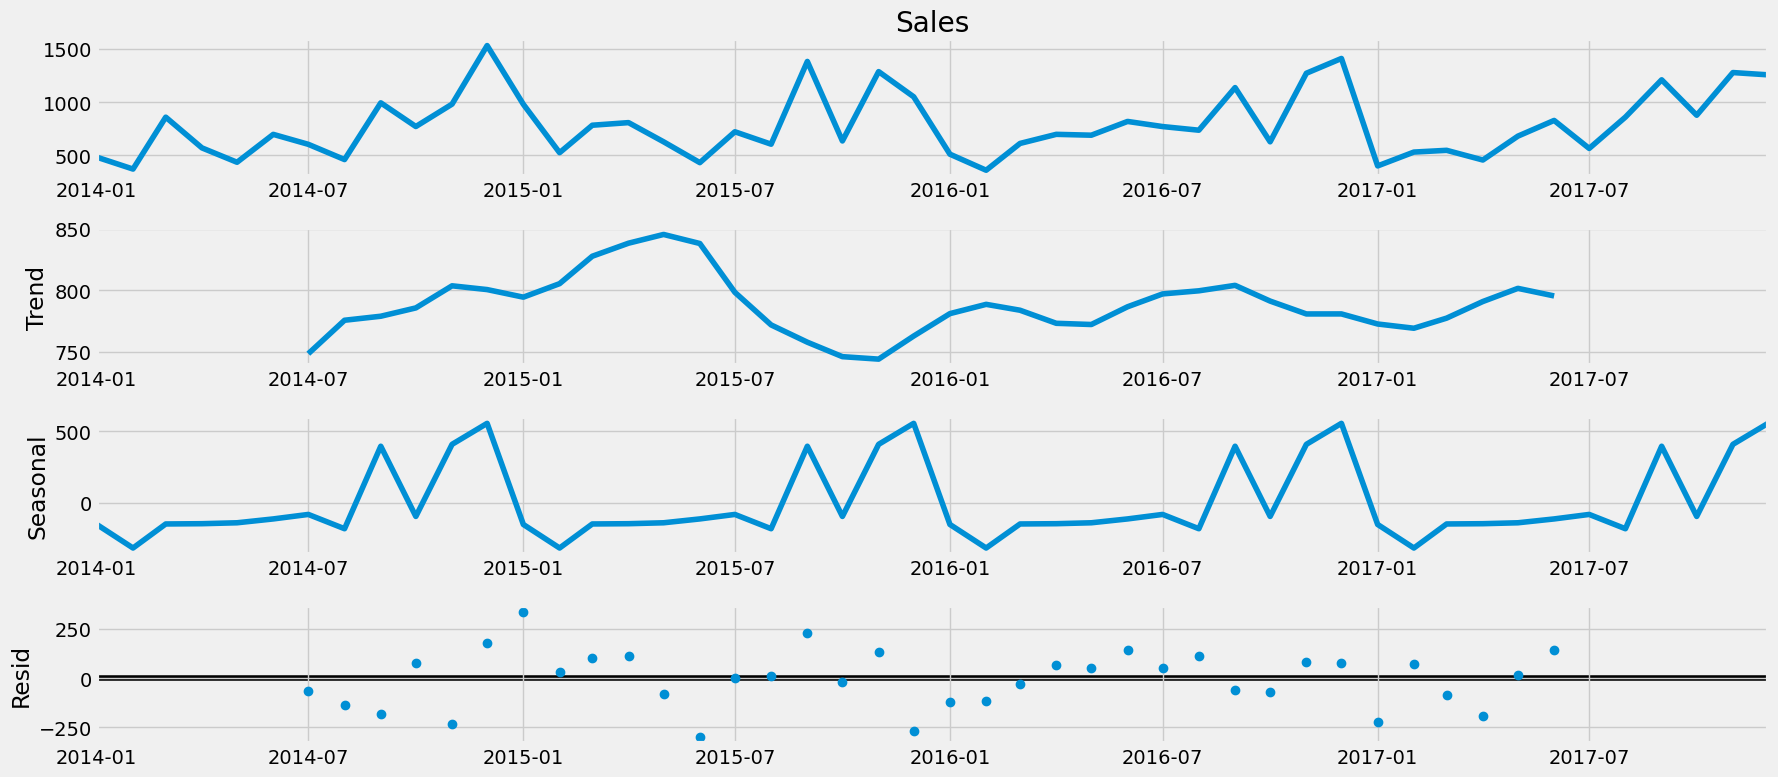

In [14]:
from pylab import rcParams
rcParams['figure.figsize']= 18, 8
decomposition= sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model

In [15]:
p = d = q = range(0,2)
pdq= list(itertools.product(p,d,q))
seasonal_pdq= [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
#using "grid search" to find optimal set of parameters to best perform the model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order= param_seasonal, enforce_stationarity=False,enforce_invertibility= False)
            results= mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915


C:\Users\essam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1567.4749364167214
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919703
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793568
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:478.27925331444305
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803027265
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758109


C:\Users\essam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2792.7305904497425
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809151
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673286


C:\Users\essam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5910637670013


C:\Users\essam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:467.5616452328524
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468657
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576520697
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504


C:\Users\essam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1702.9809434449971
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672393664
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.9671228167958
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408


C:\Users\essam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1391.4751380805899
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151422
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817279


C:\Users\essam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1431.0304781678337
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482669
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.58062333387767
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442628


C:\Users\essam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1942.4049576698933
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684173653
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.55766214612333
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712


C:\Users\essam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1533.1878380728424
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.2077675160941
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935198
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:479.7837403343145
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750845866
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692143883
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185849


C:\Users\essam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2354.027677391038
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195815127
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.3422193965922
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238771126


C:\Users\essam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:468.1895912739154
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002130148
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.751318811322
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1487.8093217957726
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611619099
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587857537
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1480.827512956423
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345419
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.3264992507967
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835422
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:316.3558250046914
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687610315
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.3873006939381
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546608466


C:\Users\essam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2147.2528056755345
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.787543953735
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.3661014415818


#### As we see the parameters that yields the lowest AIC value of 297.78 is SARIMAX(1,1,1)x(1,1,0,12). Therefore we should consider this to be optimal option

In [17]:
#Fitting the ARIMA model 
mod= sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,0,12),enforce_invertibility= False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0676      0.226      0.299      0.765      -0.376       0.511
ma.L1         -1.0000      0.279     -3.590      0.000      -1.546      -0.454
ar.S.L12      -0.4807      0.147     -3.260      0.001      -0.770      -0.192
sigma2      4.108e+04   6.78e-06   6.06e+09      0.000    4.11e+04    4.11e+04


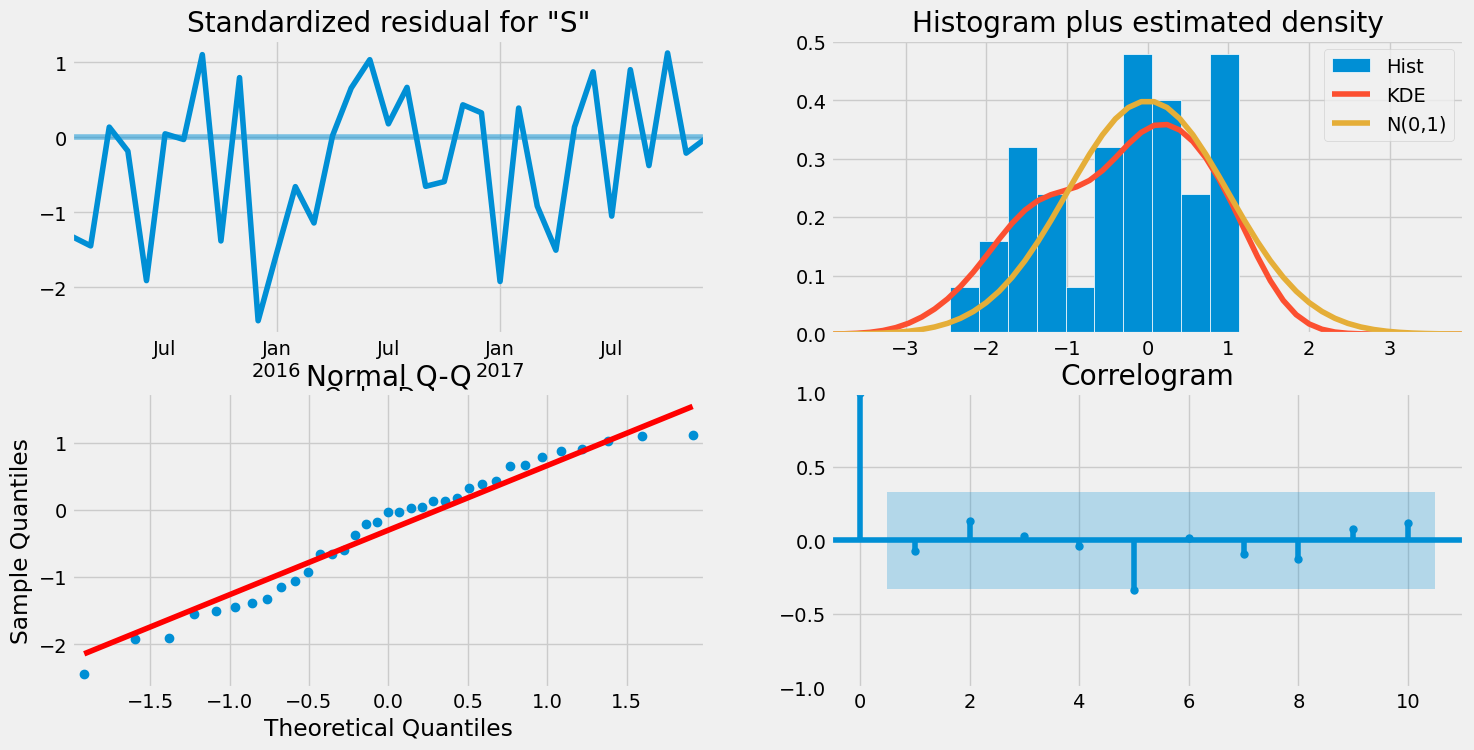

In [18]:
#running model diagnostics to investigate any unusual behaviour 
results.plot_diagnostics(figsize=(16,8))
plt.show()

## Validating forecasts 
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017-07-01 to the end of the data.

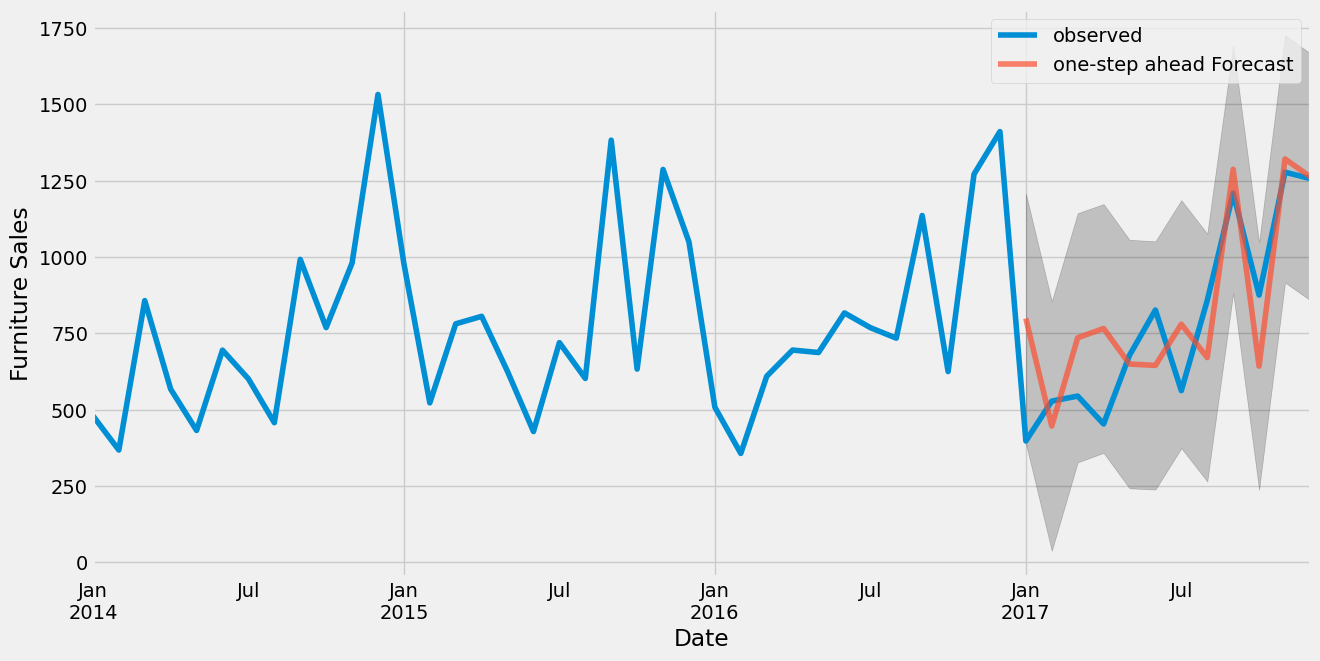

In [19]:
#validating forecasts by comparing predicted sales to real sales 
pred = results.get_prediction(start= pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci= pred.conf_int()
ax= y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='one-step ahead Forecast', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:, 1], color='k',alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [20]:
#Calculating the Mean Square Error "RME"
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted- y_truth)**2).mean()
print('The Mean Square Error of our forecast is:{}'.format(round(mse,2)))

The Mean Square Error of our forecast is:39996.01


In [21]:
#Calculating Root Mean Square Error "RMSE"
print('The Root Mean Square Error of our forecasts is: {}'.format(round(np.sqrt(mse),2)))

The Root Mean Square Error of our forecasts is: 199.99


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so f

## Producing and visualizing forecasts

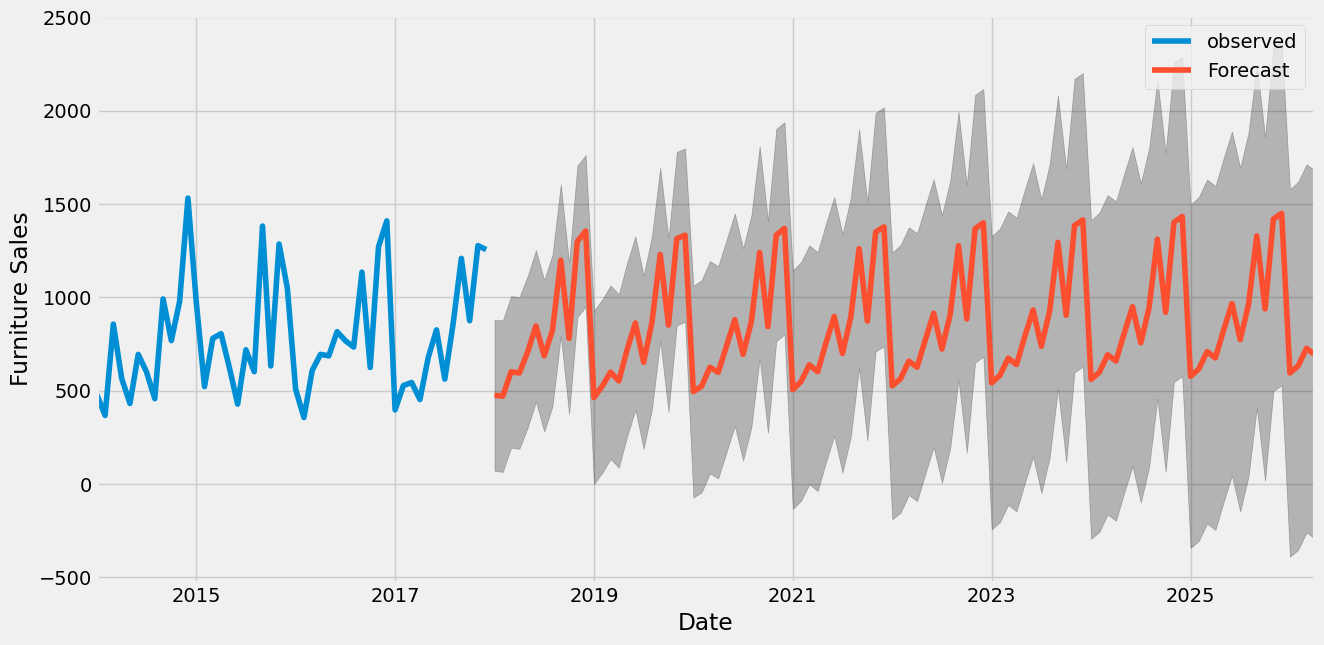

In [34]:
pred_uc = results.get_forecast(steps=100)
pred_ci= pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

The above time series analysis for furniture makes me curious about other categories, and how do they compare with each other onver time. Therefore, we are going to compare time series of furniture and office supplier.

## Time Series comparison furniture sales and Office Supplies
## Data Preprocessing

In [23]:
#Comparing Office Sales to Furniture Sales
furniture= df.loc[df['Category']== 'Furniture']
office= df.loc[df['Category']=='Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

## Data Exploration

In [24]:
#Data Exploration
cols= cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace= True)

furniture = furniture.sort_values('Order Date')
office= office.sort_values('Order Date')

furniture= furniture.groupby('Order Date')['Sales'].sum().reset_index()
office= office.groupby('Order Date')['Sales'].sum().reset_index()

furniture= furniture.set_index('Order Date')
office= office.set_index('Order Date')

y_furniture= furniture['Sales'].resample('MS').mean()
y_office= office['Sales'].resample('MS').mean()

furniture= pd.DataFrame({'Order Date':y_furniture.index,'Sales':y_furniture.values})
office= pd.DataFrame({'Order Date':y_office.index,'Sales':y_office.values})

store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x':'furniture_sales', 'Sales_y':'office_sales'}, inplace=True)
store.head()

Order Date  furniture_sales  office_sales
0 2014-01-01       480.194231    285.357647
1 2014-02-01       367.931600     63.042588
2 2014-03-01       857.291529    391.176318
3 2014-04-01       567.488357    464.794750
4 2014-05-01       432.049188    324.346545

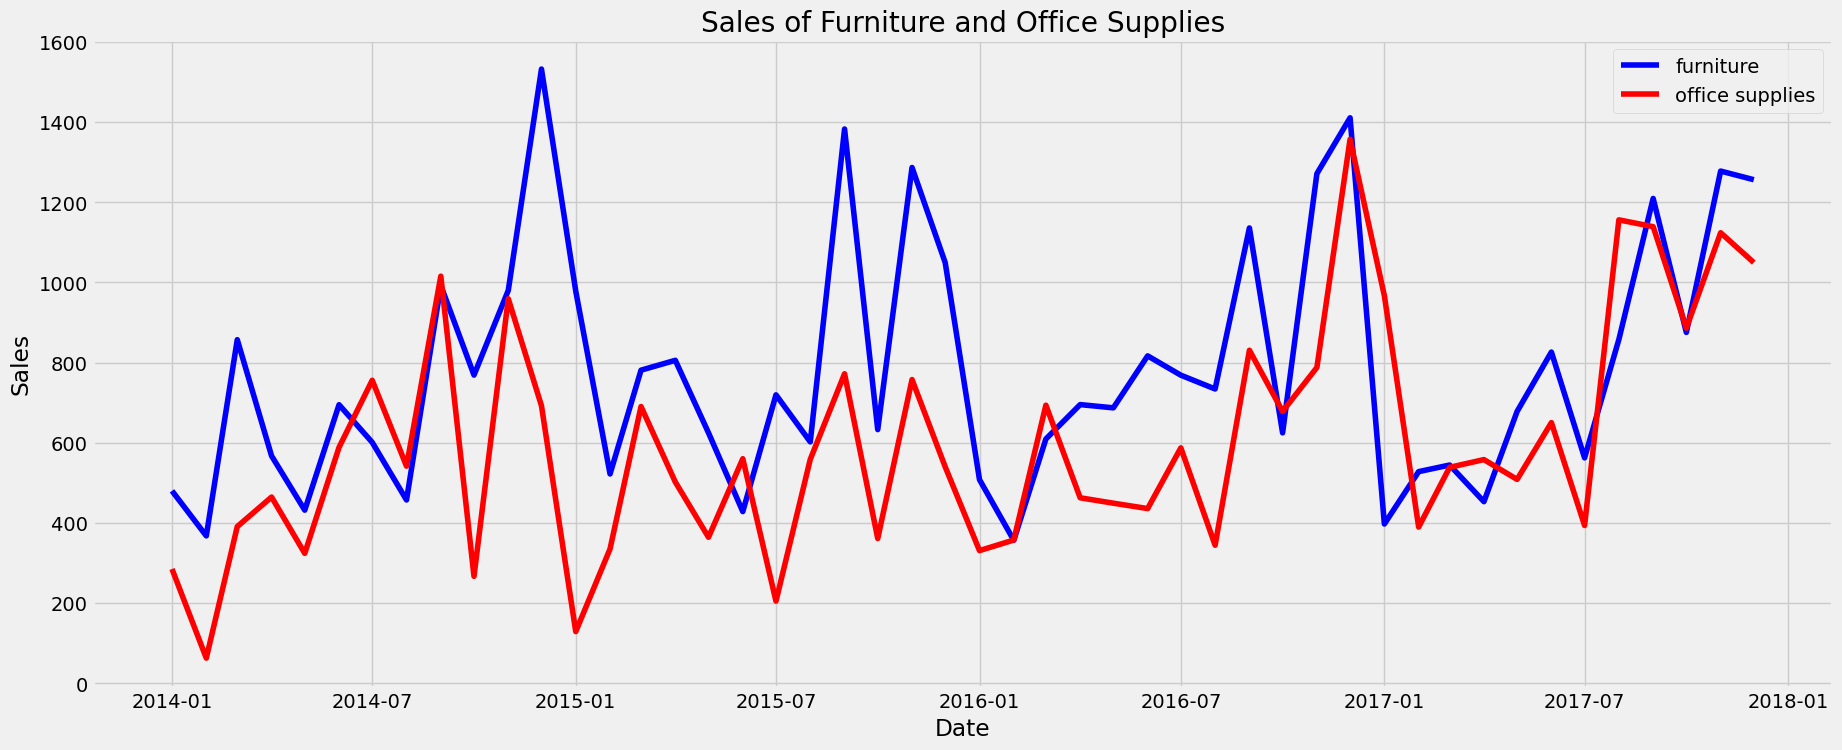

In [25]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['furniture_sales'],'b-', label='furniture')
plt.plot(store['Order Date'], store['office_sales'],'r-', label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Office Supplies')
plt.legend()

### We see that both furniture and office sales share a similar seasonality pattern. 
Early of the year is the off season for both of the two categories. It seems summer time is quiet for office supplies too. in addition, average daily sales for furniture are higher than those of office supplies in most of the months 

Next we try to find out the first time office supplies’ sales surpassed those of furniture’s.

In [26]:
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.


It was July 2014!

## Time Series Modeling with Prophet

Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

15:33:21 - cmdstanpy - INFO - Chain [1] start processing
15:33:24 - cmdstanpy - INFO - Chain [1] done processing
15:33:24 - cmdstanpy - INFO - Chain [1] start processing
15:33:25 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Furniture Sales')

<Figure size 1800x600 with 0 Axes>

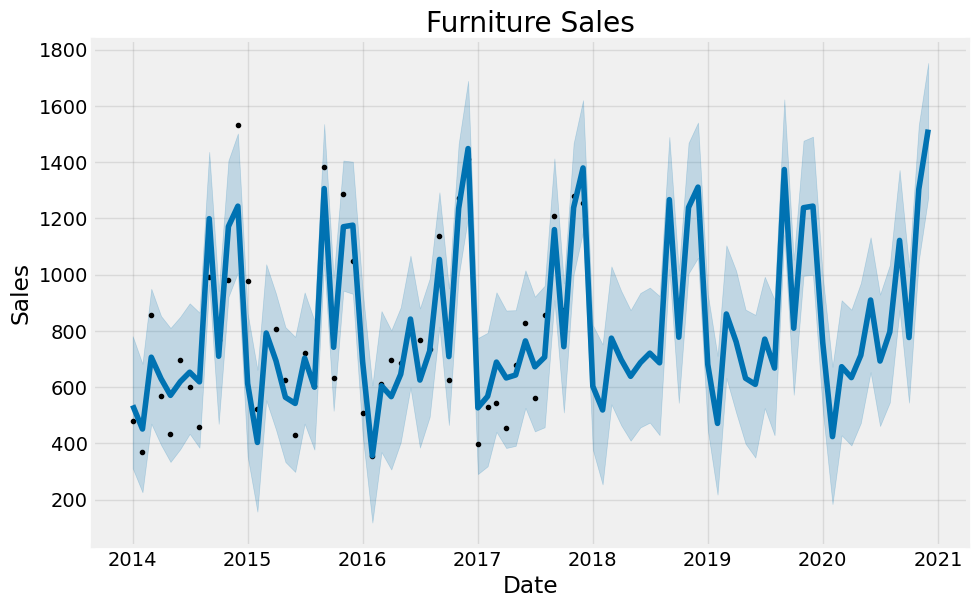

In [27]:
!pip install prophet
from prophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales')

Text(0.5, 1.0, 'Office Supplies Sales')

<Figure size 1800x600 with 0 Axes>

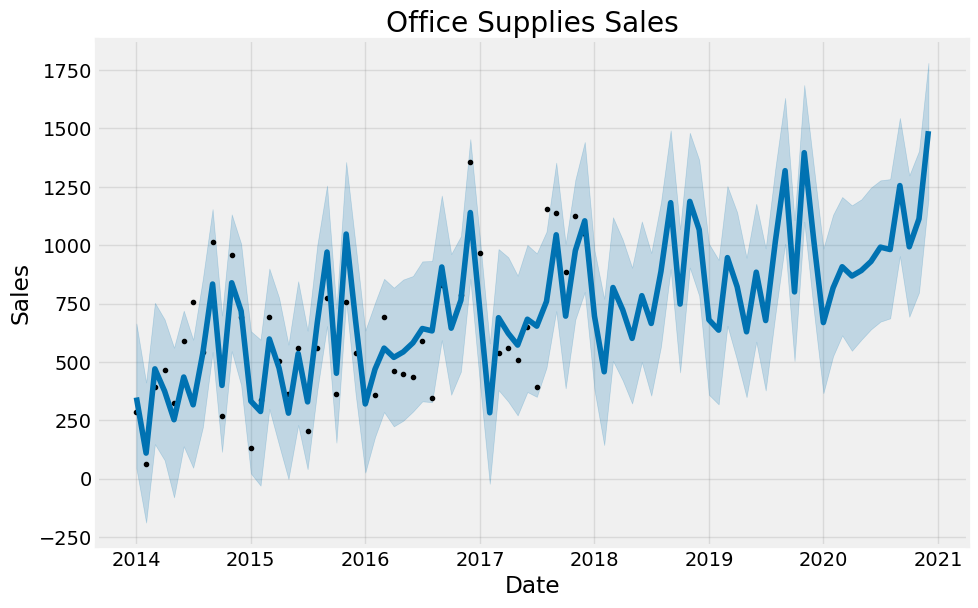

In [28]:
plt.figure(figsize=(18,6))
office_model.plot(office_forecast, xlabel='Date', ylabel='Sales')
plt.title('Office Supplies Sales')

### Compare Forecasts

We already have the forecasts for three years for these two categories into the future. We will now join them together to compare their future forecasts.



In [29]:
furniture_names= ['furniture_%s' %column for column in furniture_forecast.columns]
office_names = ['office_%s' %column for column in office_forecast.columns]

merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

merge_furniture_forecast.columns= furniture_names
merge_office_forecast.columns= office_names

forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how='inner', left_on='furniture_ds', right_on='office_ds')
forecast= forecast.rename(columns={'furniture_ds':'Date'}).drop('office_ds', axis=1)
forecast.head()

Date  furniture_trend  furniture_yhat_lower  furniture_yhat_upper  \
0 2014-01-01       726.058109            311.462169            781.075639   
1 2014-02-01       727.494421            226.239831            682.999710   
2 2014-03-01       728.791734            470.037184            949.711063   
3 2014-04-01       730.228046            394.686395            853.007650   
4 2014-05-01       731.618025            333.987534            810.229855   

   furniture_trend_lower  furniture_trend_upper  furniture_additive_terms  \
0             726.058109             726.058109               -190.686099   
1             727.494421             727.494421               -276.379157   
2             728.791734             728.791734                -22.388253   
3             730.228046             730.228046               -100.140909   
4             731.618025             731.618025               -160.818882   

   furniture_additive_terms_lower  furniture_additive_terms_upper  \
0                     -190.686099                     -190.686099   
1                     -276.379157                     -276.379157   
2                      -22.388253                      -22.388253   
3                     -100.140909                     -100.140909   
4                     -160.818882                     -160.818882   

   furniture_yearly  ...  office_additive_terms  office_additive_terms_lower  \
0       -190.686099  ...            -140.041115                  -140.041115   
1       -276.379157  ...            -385.677761                  -385.677761   
2        -22.388253  ...             -31.378526                   -31.378526   
3       -100.140909  ...            -134.290665                  -134.290665   
4       -160.818882  ...            -263.823552                  -263.823552   

   office_additive_terms_upper  office_yearly  office_yearly_lower  \
0                  -140.041115    -140.041115          -140.041115   
1                  -385.677761    -385.677761          -385.677761   
2                   -31.378526     -31.378526           -31.378526   
3                  -134.290665    -134.290665          -134.290665   
4                  -263.823552    -263.823552          -263.823552   

   office_yearly_upper  office_multiplicative_terms  \
0          -140.041115                          0.0   
1          -385.677761                          0.0   
2           -31.378526                          0.0   
3          -134.290665                          0.0   
4          -263.823552                          0.0   

   office_multiplicative_terms_lower  office_multiplicative_terms_upper  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                0.0                                0.0   

   office_yhat  
0   347.489370  
1   109.240405  
2   470.212385  
3   374.687928  
4   252.304409  

[5 rows x 31 columns]

### Trend and Forecast Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


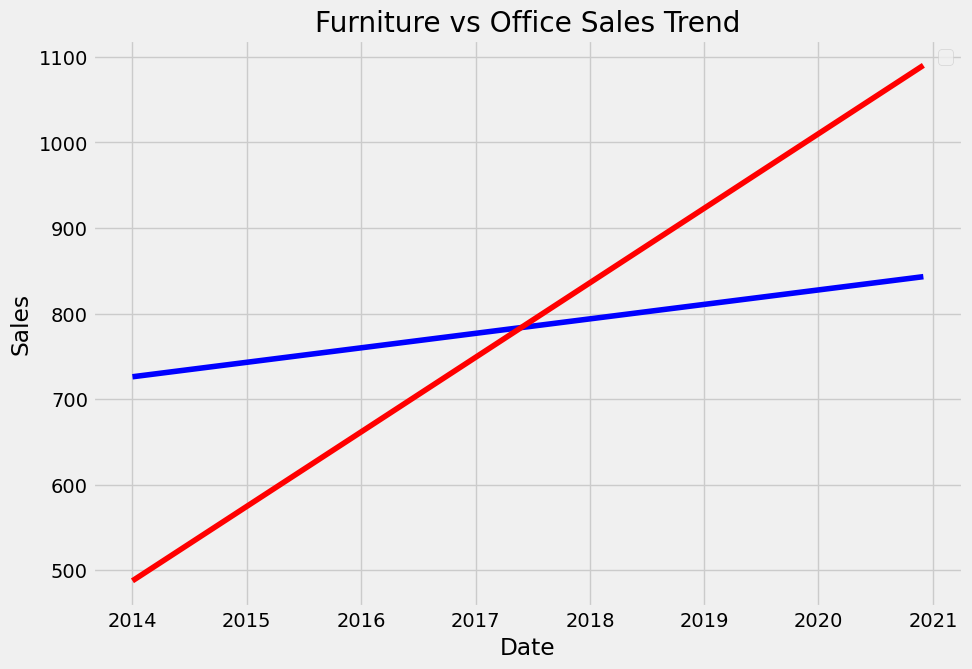

In [30]:
plt.figure(figsize=(10,7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Sales Trend')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


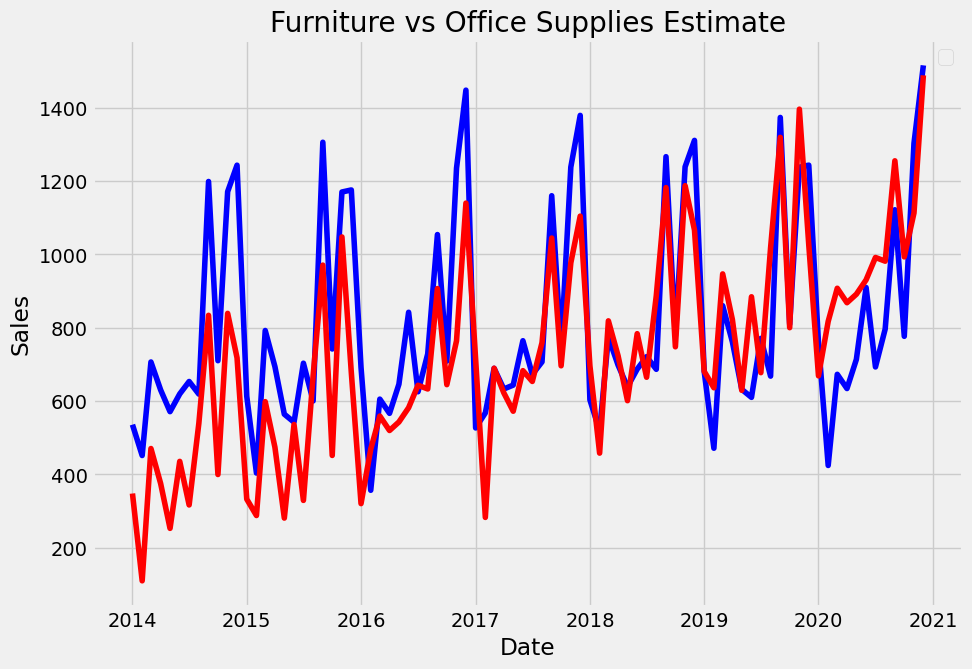

In [31]:
plt.figure(figsize=(10,7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies Estimate')
plt.legend()

### Trends and Patterns
we can use the prophet module functions to inspect different of these two categories in the data

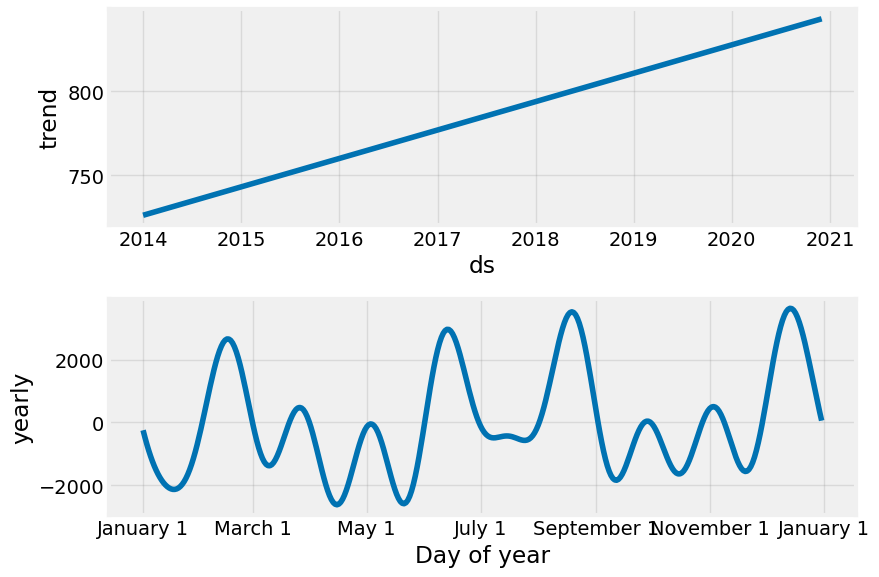

In [32]:
furniture_model.plot_components(furniture_forecast);

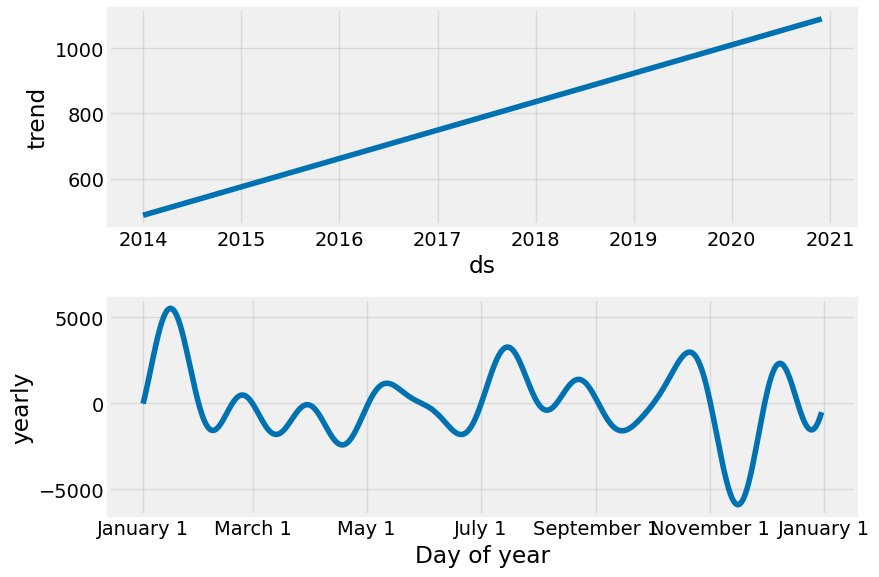

In [33]:
office_model.plot_components(office_forecast);

It's good to see that the sales for both furniture and office supplies have been linearly increasing over time and will be keep growing, although office supplies’ growth seems slightly stronger.

The worst month for furniture is April, the worst month for office supplies is February. The best month for furniture is December, and the best month for office supplies is October.

There are many time-series analysis we can explore from now on, such as forecast with uncertainty bounds, change point and anomaly detection, forecast time-series with external data source. We have only just started.